In [125]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

# Import Required Modules

In [126]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
eps = np.finfo(float).eps
import operator
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pprint
import random
import sys
import csv

In [127]:
temp = np.zeros((3, 2))
temp1 = np.ones((3, 1))
res = temp - temp1
# res
res = np.square(res)
np.sum(res, axis = 0)

array([3., 3.])

In [185]:
class CNN(object):
    def convolve(input, filter, stride, activationFunc):
        img_dim1, img_dim2, img_channels = input.shape
        filt_dim1, filt_dim2, num_filters = filter
        filters = generateFilters(filt_dim1, filt_dim2, num_filters, img_channels)
        convolved_dim = int((img_dim1 - filt_dim1) / stride) + 1
        conv_output = np.zeros((convolved_dim, convolved_dim, num_filters))
    
        for k in range(0, num_filters):
            y = 0
            for i in range(0, img_dim1 - filt_dim1 + 1, stride):
                x = 0
                for j in range(0, img_dim2 - filt_dim2 + 1, stride):
                    conv_output[y, x, k] = np.sum(filters[:, :, :, k] * input[i : i + filt_dim1, j : j + filt_dim2, :])
                    x += 1
                y += 1
        
        return activationFunc(conv_output)
    
    def pooling(input, filter_size = 2, stride = 1):
        img_dim1_prev, img_dim2_prev, img_channels = input.shape
        pooled_dim1 = int((img_dim1_prev - filter_size) / stride) + 1
        pooled_dim2 = int((img_dim2_prev - filter_size) / stride) + 1
        
        pooled_output = np.zeros((pooled_dim1, pooled_dim2, img_channels))
        
        for k in range(0, img_channels):
            y = 0
            for i in range(0, img_dim2_prev - filter_size + 1, stride):
                x = 0
                for j in range(0, img_dim1_prev - filter_size + 1, stride):
                    pooled_output[y, x, k] = np.max(input[i : i + filter_size, j : j + filter_size, k])
                    x += 1
                y += 1
        return pooled_output
    
    def fullyConnected(inp, dim1, dim2, activationFunc, Gaussian = None):
        if(Gaussian == None):
            fc_filter = np.random.randn(dim1, dim2)
            output = np.dot(fc_filter, inp)
            output = activationFunc(output)
            return output
        else:
            fc_filter = np.random.randn(dim2, dim1)
            output = fc_filter - inp
            output = np.square(output)
            output = np.sum(output, axis = 0)
            return output
    

In [129]:
def ReLU(inp):
    temp = np.maximum(0, inp)
    return temp

In [130]:
def sigmoid(inp):
    sigm = 1. / (1. + np.exp(-inp))
    return sigm

In [131]:
def tanh(inp):
    return np.tanh(inp)

In [132]:
def generateFilters(filt_dim1, filt_dim2, num_filters, img_channels):
    filters = np.zeros((filt_dim1, filt_dim2, img_channels, num_filters))
    for i in range(num_filters):
        f = np.random.randn(filt_dim1, filt_dim2, img_channels)
        filters[:, :, :, i] = f
    return filters

In [133]:
def plot(input, rows, cols, label):
    %matplotlib inline
    print(label)
    print("Output Shape : ", input.shape)
    f, ax = plt.subplots(rows, cols, figsize=(7,7), constrained_layout=True)
    itr = 0
    for i in range(rows):
        for j in range(cols):
            ax[i, j].imshow(input[:, :, itr])
            itr += 1
    
    

In [134]:
def softmax(matrix):
    shift_x = matrix - np.max(matrix)
    exps = np.exp(shift_x)
    return exps / np.array([np.sum(exps)])

## Input RGB Image

(32, 32, 4)


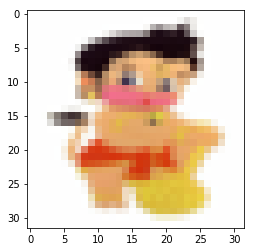

In [135]:
img = plt.imread("image_1.ico") 
print(img.shape)
plt.imshow(img)

# CNN Forward Propagation Using ReLU

## <font color = "blue">First Layer (Convolution)</font>

Output After First Layer(Convolution) : 
Output Shape :  (28, 28, 6)


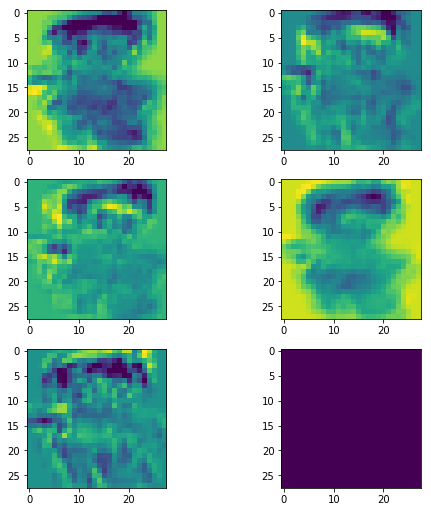

In [186]:
layer1_conv = CNN.convolve(img, [5, 5, 6], 1, ReLU)
plot(layer1_conv, 3, 2, "Output After First Layer(Convolution) : ")

## <font color = "blue">Second Layer (Max Pooling)</font>

Output After Second Layer(Max Pool) : 
Output Shape :  (14, 14, 6)


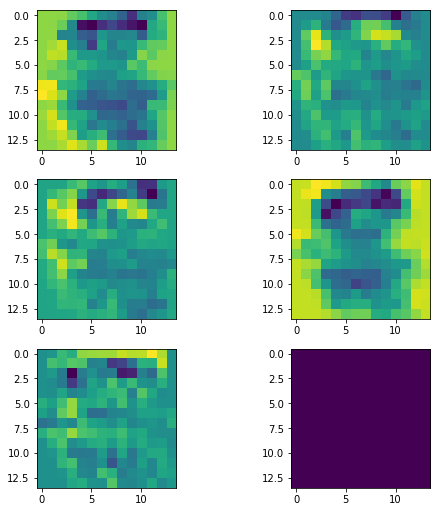

In [187]:
layer2_max_pool = CNN.pooling(layer1_conv, 2, 2)
plot(layer2_max_pool, 3, 2, "Output After Second Layer(Max Pool) : ")

## <font color = "blue">Third Layer (Convolution)</font>

Output After Third Layer(Convolution) : 
Output Shape :  (10, 10, 16)


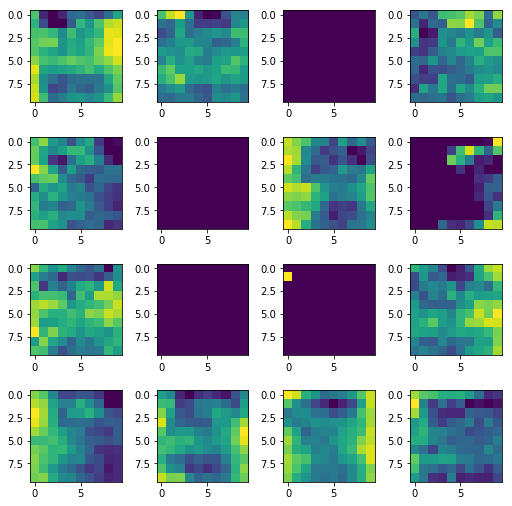

In [188]:
layer3_conv = CNN.convolve(layer2_max_pool, [5, 5, 16], 1, ReLU)
plot(layer3_conv, 4, 4, "Output After Third Layer(Convolution) : ")

## <font color = "blue">Fourth Layer (Max Pooling)</font>

Output After Fourth Layer(Max Pool) : 
Output Shape :  (5, 5, 16)


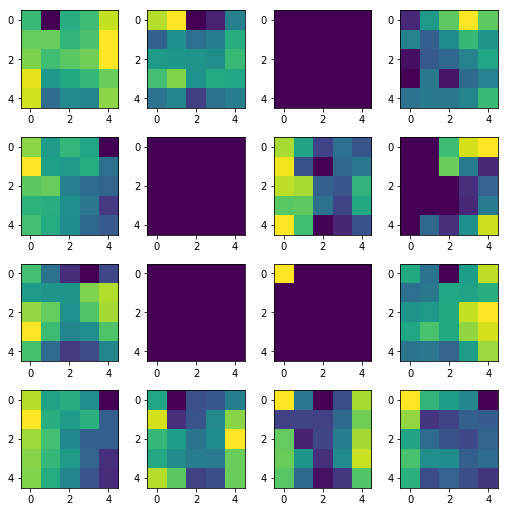

In [189]:
layer4_max_pool = CNN.pooling(layer3_conv, 2, 2)
plot(layer4_max_pool, 4, 4, "Output After Fourth Layer(Max Pool) : ")

## <font color = "blue">Fifth Layer (Convolution)</font>

In [190]:
layer5_conv = CNN.convolve(layer4_max_pool, [5, 5, 120], 1, ReLU)
layer5_conv = np.reshape(layer5_conv, (120,1))
layer5_conv.shape

(120, 1)

## <font color = "blue">Sixth Layer (Fully Connected)</font>

In [191]:
layer6_fc = CNN.fullyConnected(layer5_conv, 84, layer5_conv.shape[0], ReLU, None)
layer6_fc.shape

(84, 1)

## <font color = "blue">Seventh Layer (Fully Connected With Gaussian Connections)</font>

In [192]:
layer7_fc = CNN.fullyConnected(layer6_fc, 10, layer6_fc.shape[0], ReLU, "Gaussian")
layer7_fc = np.reshape(layer7_fc, (10,1))
print(layer7_fc.shape)
layer7_fc

(10, 1)


array([[1.03269352e+15],
       [1.03269362e+15],
       [1.03269356e+15],
       [1.03269369e+15],
       [1.03269370e+15],
       [1.03269349e+15],
       [1.03269359e+15],
       [1.03269362e+15],
       [1.03269361e+15],
       [1.03269360e+15]])

In [193]:
final_output = softmax(layer7_fc)
final_output

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

# CNN Forward Propagation Using Sigmoid

## <font color = "blue">First Layer (Convolution)</font>

/home/kaushik/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Output After First Layer(Convolution) : 
Output Shape :  (28, 28, 6)


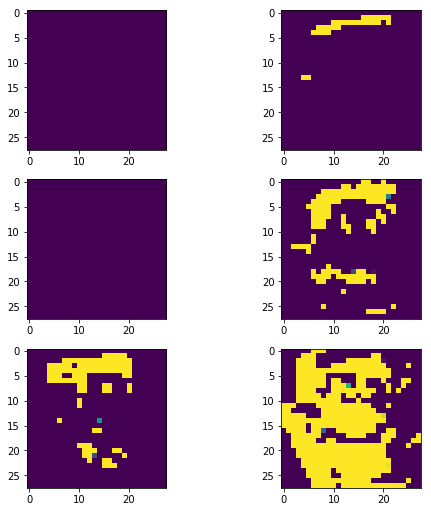

In [194]:
layer1_conv = CNN.convolve(img, [5, 5, 6], 1, sigmoid)
plot(layer1_conv, 3, 2, "Output After First Layer(Convolution) : ")

## <font color = "blue">Second Layer (Max Pooling)</font>

Output After Second Layer(Max Pool) : 
Output Shape :  (14, 14, 6)


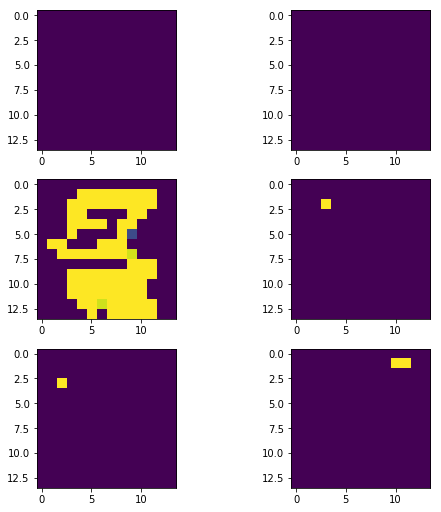

In [195]:
layer2_max_pool_sigm = CNN.pooling(layer1_conv_sigm, 2, 2)
plot(layer2_max_pool_sigm, 3, 2, "Output After Second Layer(Max Pool) : ")

## <font color = "blue">Third Layer (Convolution)</font>

Output After Third Layer(Convolution) : 
Output Shape :  (10, 10, 16)


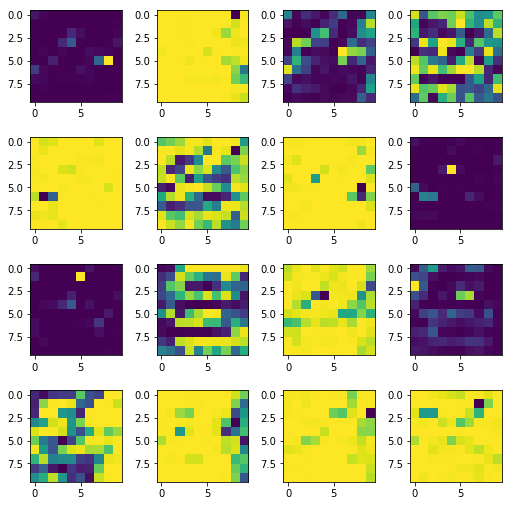

In [196]:
layer3_conv_sigm = CNN.convolve(layer2_max_pool_sigm, [5, 5, 16], 1, sigmoid)
plot(layer3_conv_sigm, 4, 4, "Output After Third Layer(Convolution) : ")

## <font color = "blue">Fourth Layer (Max Pooling)</font>

Output After Fourth Layer(Max Pool) : 
Output Shape :  (5, 5, 16)


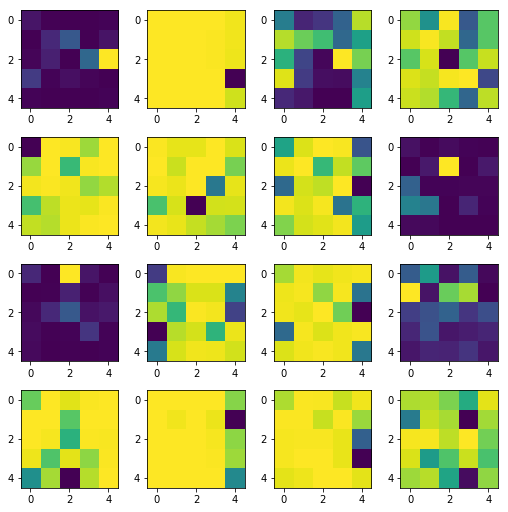

In [197]:
layer4_max_pool_sigm = CNN.pooling(layer3_conv_sigm, 2, 2)
plot(layer4_max_pool_sigm, 4, 4, "Output After Fourth Layer(Max Pool) : ")

## <font color = "blue">Fifth Layer (Convolution)</font>

In [198]:
layer5_conv_sigm = CNN.convolve(layer4_max_pool_sigm, [5, 5, 120], 1, sigmoid)
layer5_conv_sigm = np.reshape(layer5_conv_sigm, (120,1))
layer5_conv_sigm.shape

(120, 1)

## <font color = "blue">Sixth Layer (Fully Connected)</font>

In [199]:
layer6_fc_sigm = CNN.fullyConnected(layer5_conv_sigm, 84, layer5_conv_sigm.shape[0], sigmoid, None)
layer6_fc_sigm.shape

(84, 1)

## <font color = "blue">Seventh Layer (Fully Connected With Gaussian Connections)</font>

In [200]:
layer7_fc_sigm = CNN.fullyConnected(layer6_fc_sigm, 10, layer6_fc_sigm.shape[0], sigmoid, "Gaussian")
layer7_fc_sigm = np.reshape(layer7_fc_sigm, (10,1))
print(layer7_fc_sigm.shape)
layer7_fc_sigm

(10, 1)


array([[148.23172505],
       [108.6318974 ],
       [141.3336595 ],
       [134.2060185 ],
       [ 93.95882295],
       [117.67231118],
       [130.5639457 ],
       [132.66676485],
       [ 95.10643388],
       [140.26181641]])

# CNN Forward Propagation Using Tanh

## <font color = "blue">First Layer (Convolution)</font>

Output After First Layer(Convolution) : 
Output Shape :  (28, 28, 6)


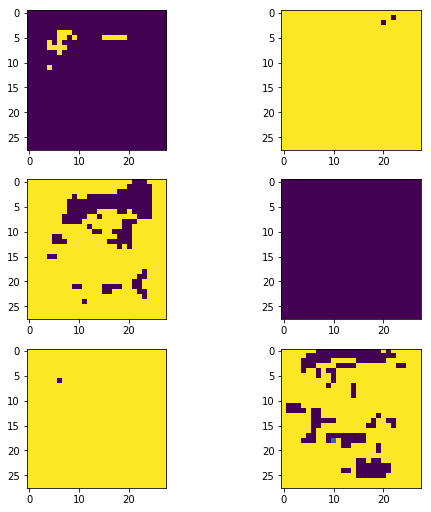

In [201]:
layer1_conv_tanh = CNN.convolve(img, [5, 5, 6], 1, tanh)
plot(layer1_conv_tanh, 3, 2, "Output After First Layer(Convolution) : ")

## <font color = "blue">Second Layer (Max Pooling)</font>

Output After Second Layer(Max Pool) : 
Output Shape :  (14, 14, 6)


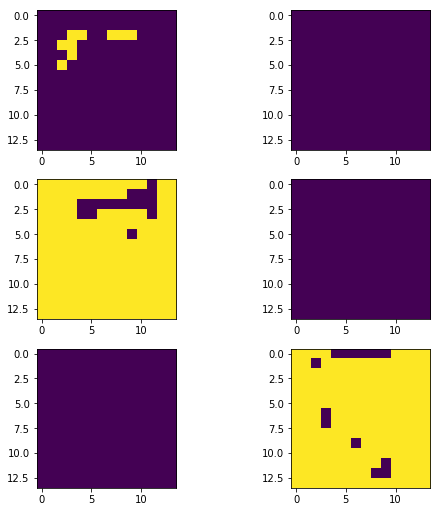

In [202]:
layer2_max_pool_tanh = CNN.pooling(layer1_conv_tanh, 2, 2)
plot(layer2_max_pool_tanh, 3, 2, "Output After Second Layer(Max Pool) : ")

## <font color = "blue">Third Layer (Convolution)</font>

Output After Third Layer(Convolution) : 
Output Shape :  (10, 10, 16)


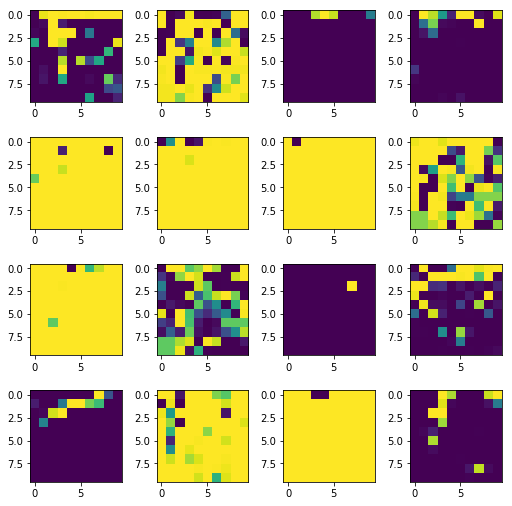

In [203]:
layer3_conv_tanh = CNN.convolve(layer2_max_pool_tanh, [5, 5, 16], 1, tanh)
plot(layer3_conv_tanh, 4, 4, "Output After Third Layer(Convolution) : ")

## <font color = "blue">Fourth Layer (Max Pooling)</font>

Output After Fourth Layer(Max Pool) : 
Output Shape :  (5, 5, 16)


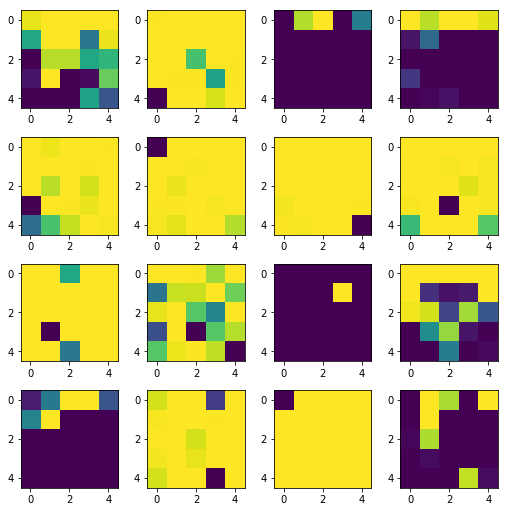

In [204]:
layer4_max_pool_tanh = CNN.pooling(layer3_conv_tanh, 2, 2)
plot(layer4_max_pool_tanh, 4, 4, "Output After Fourth Layer(Max Pool) : ")

## <font color = "blue">Fifth Layer (Convolution)</font>

In [205]:
layer5_conv_tanh = CNN.convolve(layer4_max_pool_tanh, [5, 5, 120], 1, tanh)
layer5_conv_tanh = np.reshape(layer5_conv_tanh, (120,1))
layer5_conv_tanh.shape

(120, 1)

## <font color = "blue">Sixth Layer (Fully Connected)</font>

In [206]:
layer6_fc_tanh = CNN.fullyConnected(layer5_conv_tanh, 84, layer5_conv_tanh.shape[0], tanh, None)
layer6_fc_tanh.shape

(84, 1)

## <font color = "blue">Seventh Layer (Fully Connected With Gaussian Connections)</font>

In [207]:
layer7_fc_tanh = CNN.fullyConnected(layer6_fc_tanh, 10, layer6_fc_tanh.shape[0], tanh, "Gaussian")
layer7_fc_tanh = np.reshape(layer7_fc_tanh, (10,1))
print(layer7_fc_tanh.shape)
layer7_fc_tanh

(10, 1)


array([[116.81356983],
       [199.91451313],
       [176.06674156],
       [120.26738049],
       [211.79268424],
       [181.41155848],
       [161.125166  ],
       [144.9228866 ],
       [136.91815891],
       [161.85515727]])